In [1]:
import pandas as pd
df=pd.read_csv('/Users/amitkommineni/Desktop/SEM 3/650/Project/combined_data.csv')

In [23]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder

In [3]:
df.head()

,icustay_id,hadm_id,subject_id,icd9_code,charttime_creat,charttime_uo,creat,uo_rt_6hr,uo_rt_12hr,uo_rt_24hr,...,anion_gap,bun,glucose,potassium,blood_glucose,comorbidities,complications,total_infusion_volume,infusion_unit,mechanical_ventilation
0,200030,165426,14987,25012,2150-11-13 08:58:00,2150-11-14 15:00:00,1.9,110.000000,112.500000,178.333333,...,14.222222,17.846154,NaN,3.788889,NaN,"UTI, Hypertension",NaN,22929.968149,ml,0
1,200398,168520,20457,25011,2118-03-09 01:00:00,2118-03-10 04:00:00,0.9,188.333333,167.083333,271.250000,...,15.250000,4.555556,1000.0,3.611111,174.333333,NaN,NaN,9642.937021,ml,0
2,200746,186721,4588,25013,2113-03-03 21:45:00,NaN,1.0,NaN,NaN,NaN,...,13.777778,17.111111,NaN,4.433333,273.000000,NaN,NaN,24870.000000,ml,0
3,200764,154098,11861,25013,2131-07-29 16:31:00,NaN,0.9,NaN,NaN,NaN,...,15.117647,5.764706,625.0,3.741176,NaN,UTI,NaN,71080.000000,ml,0
4,200893,163997,9087,25012,2151-09-11 05:00:00,2151-09-12 15:00:00,0.6,68.333333,74.166667,77.500000,...,16.375000,16.875000,1000.0,3.950000,234.000000,UTI,NaN,2130.000000,ml,0


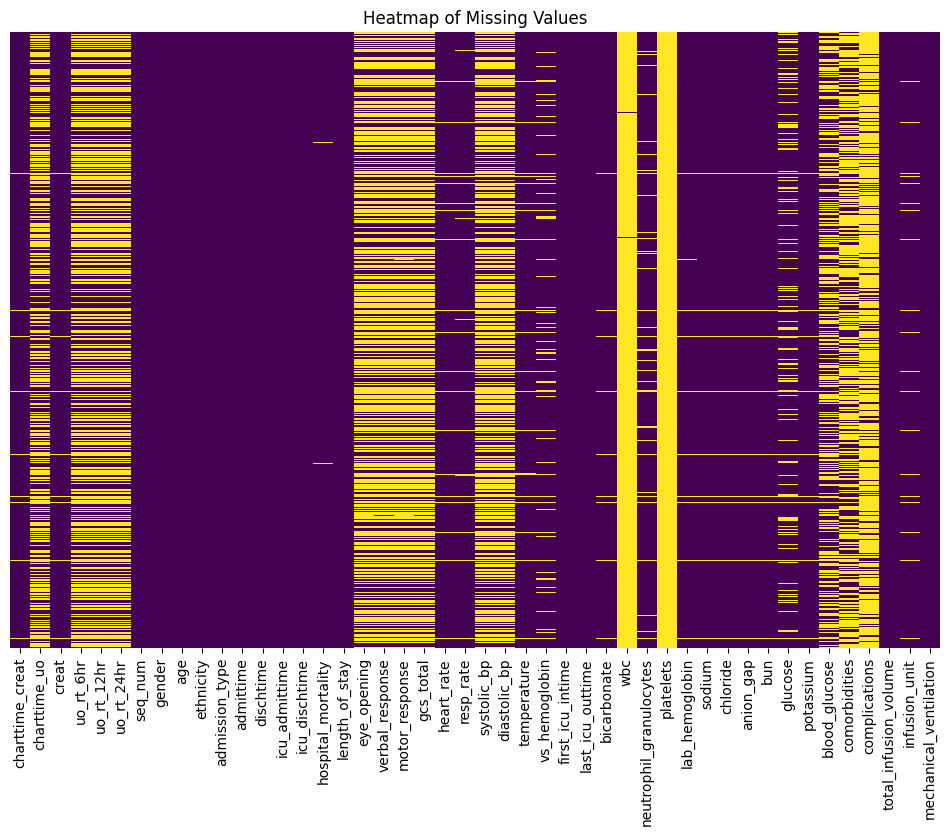

In [4]:
# Drop the specified columns
df_visualize = df.drop(['icustay_id', 'subject_id', 'hadm_id', 'icd9_code'], axis=1)

# Set the size of the plot
plt.figure(figsize=(12, 8))  # Adjust the size to fit all 47 variables

# Create a heatmap of null values for the remaining columns
sns.heatmap(df_visualize.isnull(), cbar=False, cmap="viridis", yticklabels=False)

# Add title
plt.title("Heatmap of Missing Values")
plt.show()


In [5]:
des = df.drop(['icustay_id', 'subject_id', 'hadm_id', 'icd9_code'], axis=1)
des.describe()

,creat,uo_rt_6hr,uo_rt_12hr,uo_rt_24hr,seq_num,age,hospital_mortality,length_of_stay,eye_opening,verbal_response,...,lab_hemoglobin,sodium,chloride,anion_gap,bun,glucose,potassium,blood_glucose,total_infusion_volume,mechanical_ventilation
count,808.000000,420.000000,420.000000,420.000000,822.000000,822.000000,820.000000,822.000000,341.000000,342.000000,...,807.000000,808.000000,808.000000,808.000000,808.000000,687.000000,808.000000,461.000000,8.220000e+02,822.000000
mean,2.108787,185.163889,157.823413,152.372520,2.183698,48.931873,0.024390,6.695864,3.870968,4.640351,...,11.354892,138.064187,105.038910,16.372778,23.913807,801.470507,4.158582,388.618402,2.724775e+04,0.119221
std,1.921330,160.251776,137.988083,121.931301,2.272877,31.296939,0.154352,7.328715,0.498004,1.086795,...,1.742162,3.992099,5.025496,2.707398,17.328618,294.236068,0.406620,209.795144,8.663743e+04,0.324246
min,0.400000,0.000000,0.000000,0.000000,1.000000,15.000000,0.000000,0.000000,1.000000,1.000000,...,7.213636,123.750000,87.500000,9.000000,2.083333,70.000000,3.050000,34.000000,0.000000e+00,0.000000
25%,1.000000,95.416667,83.333333,83.072917,1.000000,34.000000,0.000000,3.000000,4.000000,5.000000,...,10.010000,135.777778,101.741071,14.491667,11.618750,579.166667,3.906920,229.000000,6.944239e+03,0.000000
50%,1.400000,144.000000,135.000000,127.291667,1.000000,46.000000,0.000000,4.000000,4.000000,5.000000,...,11.266667,137.609524,104.782353,16.105556,17.822917,1000.000000,4.121429,356.000000,1.324630e+04,0.000000
75%,2.200000,233.333333,195.937500,196.979167,2.000000,58.000000,0.000000,8.000000,4.000000,5.000000,...,12.658571,140.129464,108.000000,17.916667,31.116667,1000.000000,4.350000,499.000000,2.442750e+04,0.000000
max,13.600000,1627.333333,1737.666667,1370.666667,19.000000,306.000000,1.000000,78.000000,4.000000,5.000000,...,17.600000,155.692308,122.333333,29.750000,103.800000,1000.000000,6.900000,1359.000000,2.022780e+06,1.000000


In [6]:
df.dtypes

icustay_id                   int64
hadm_id                      int64
subject_id                   int64
icd9_code                    int64
charttime_creat             object
charttime_uo                object
creat                      float64
uo_rt_6hr                  float64
uo_rt_12hr                 float64
uo_rt_24hr                 float64
seq_num                      int64
gender                      object
age                          int64
ethnicity                   object
admission_type              object
admittime                   object
dischtime                   object
icu_admittime               object
icu_dischtime               object
hospital_mortality         float64
length_of_stay               int64
eye_opening                float64
verbal_response            float64
motor_response             float64
gcs_total                  float64
heart_rate                 float64
resp_rate                  float64
systolic_bp                float64
diastolic_bp        

In [7]:
# Convert admittime and dischtime to datetime
df['charttime_creat'] = pd.to_datetime(df['charttime_creat'])
df['charttime_uo'] = pd.to_datetime(df['charttime_uo'])
df['admittime'] = pd.to_datetime(df['admittime'])
df['dischtime'] = pd.to_datetime(df['dischtime'])
df['first_icu_intime'] = pd.to_datetime(df['first_icu_intime'])
df['last_icu_outtime'] = pd.to_datetime(df['last_icu_outtime'])

In [8]:
# Verify the conversion
df[['admittime', 'dischtime', 'first_icu_intime', 'last_icu_outtime','charttime_creat', 'charttime_uo']].dtypes

admittime           datetime64[ns]
dischtime           datetime64[ns]
first_icu_intime    datetime64[ns]
last_icu_outtime    datetime64[ns]
charttime_creat     datetime64[ns]
charttime_uo        datetime64[ns]
dtype: object

In [9]:
df[['admittime', 'dischtime', 'first_icu_intime', 'last_icu_outtime','charttime_creat', 'charttime_uo']].head()

,admittime,dischtime,first_icu_intime,last_icu_outtime,charttime_creat,charttime_uo
0,2150-11-13 14:06:00,2150-12-04 17:55:00,2150-11-13 14:08:02,2150-11-19 17:51:59,2150-11-13 08:58:00,2150-11-14 15:00:00
1,2118-03-09 02:05:00,2118-03-11 20:30:00,2118-03-09 02:06:06,2118-03-10 20:55:35,2118-03-09 01:00:00,2118-03-10 04:00:00
2,2113-03-03 20:19:00,2113-03-08 16:25:00,2113-03-04 01:17:22,2113-03-07 16:09:00,2113-03-03 21:45:00,NaT
3,2131-07-27 23:15:00,2131-08-03 16:06:00,2131-07-27 23:15:59,2131-08-02 20:59:23,2131-07-29 16:31:00,NaT
4,2151-09-11 10:38:00,2151-09-16 15:00:00,2151-09-11 10:39:35,2151-09-12 20:24:13,2151-09-11 05:00:00,2151-09-12 15:00:00


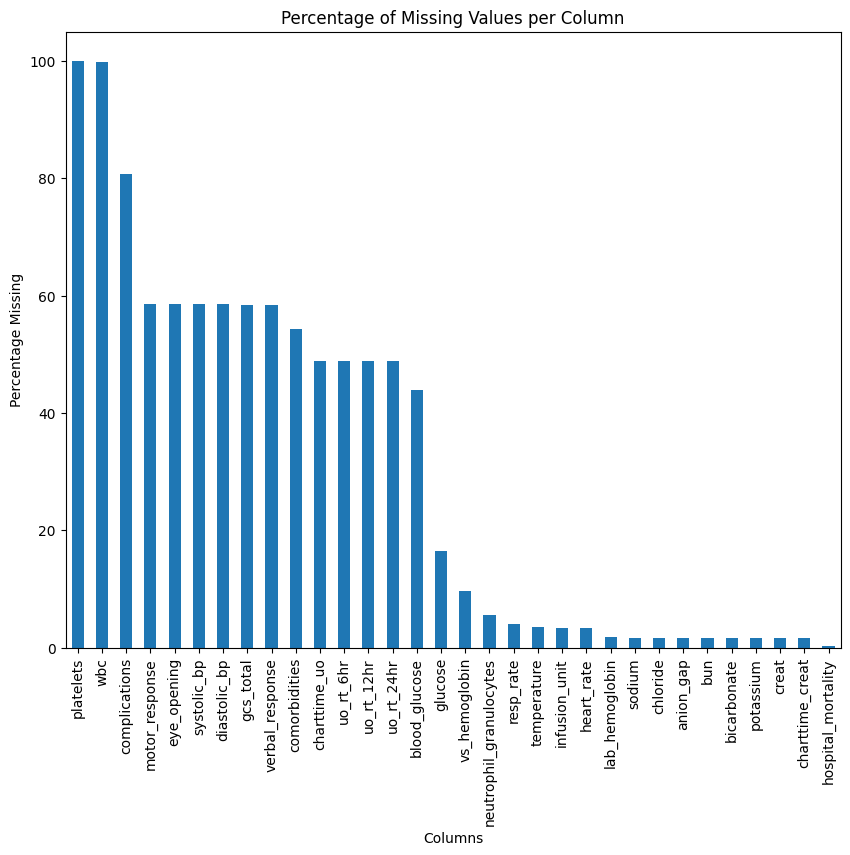

In [10]:
missing_values = df.drop(['icustay_id', 'subject_id', 'hadm_id'], axis=1).isnull().mean() * 100
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

plt.figure(figsize=(10, 8))
missing_values.plot(kind='bar')
plt.title("Percentage of Missing Values per Column")
plt.xlabel("Columns")
plt.ylabel("Percentage Missing")
plt.show()

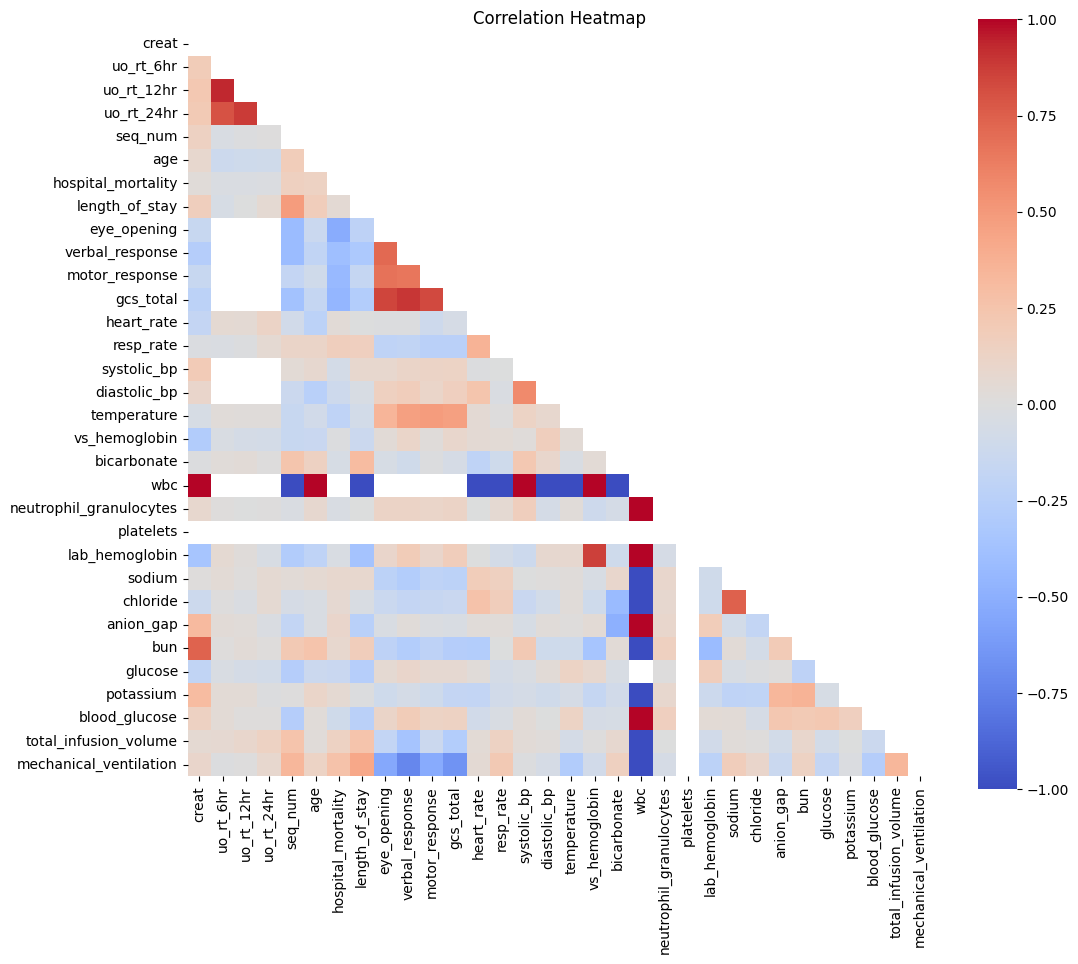

In [11]:
# Select only numeric columns for correlation
numeric_df = df.drop(['icustay_id', 'subject_id', 'hadm_id', 'icd9_code'], axis=1).select_dtypes(include=['number'])

# Compute the correlation matrix
corr = numeric_df.corr()

# Create a mask to display only the lower triangle of the heatmap
mask = np.triu(np.ones_like(corr, dtype=bool))

# Plot the correlation heatmap with the mask
plt.figure(figsize=(12, 10))
sns.heatmap(corr, mask=mask, annot=False, cmap="coolwarm", square=True)
plt.title("Correlation Heatmap")
plt.show()


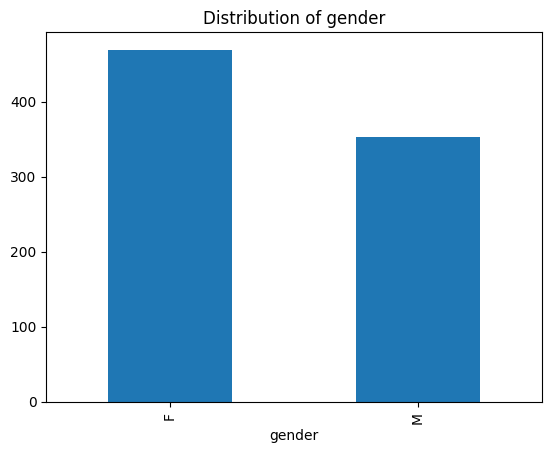

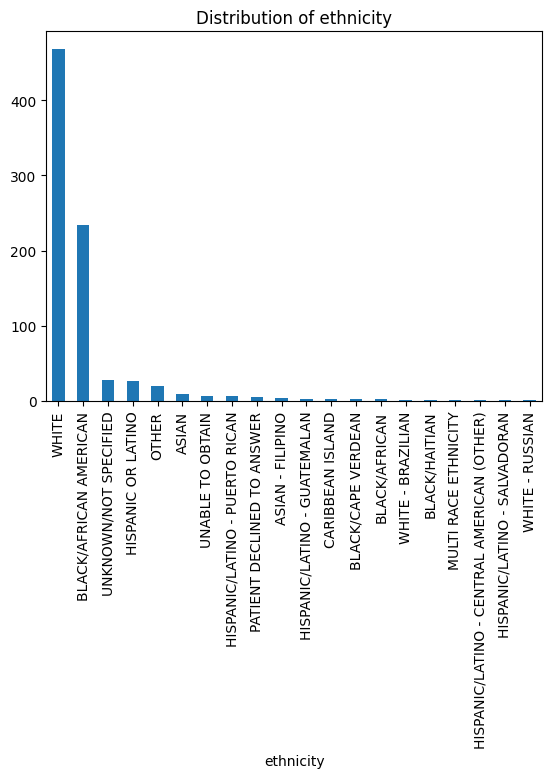

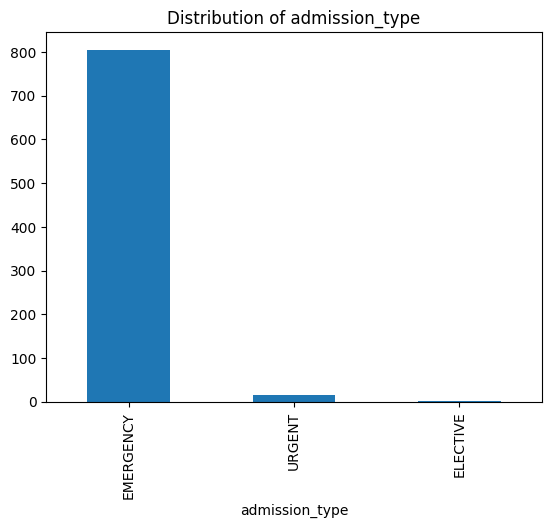

In [12]:
categorical_cols = ['gender', 'ethnicity', 'admission_type']
for col in categorical_cols:
    df[col].value_counts().plot(kind='bar')
    plt.title(f"Distribution of {col}")
    plt.show()

In [13]:
# The count of missing values in each column
missing_values = df.isnull().sum()
print(missing_values)

icustay_id                   0
hadm_id                      0
subject_id                   0
icd9_code                    0
charttime_creat             14
charttime_uo               402
creat                       14
uo_rt_6hr                  402
uo_rt_12hr                 402
uo_rt_24hr                 402
seq_num                      0
gender                       0
age                          0
ethnicity                    0
admission_type               0
admittime                    0
dischtime                    0
icu_admittime                0
icu_dischtime                0
hospital_mortality           2
length_of_stay               0
eye_opening                481
verbal_response            480
motor_response             482
gcs_total                  480
heart_rate                  28
resp_rate                   33
systolic_bp                481
diastolic_bp               481
temperature                 29
vs_hemoglobin               80
first_icu_intime             0
last_icu

In [14]:
percent_missing = df.isnull().mean() * 100
print(percent_missing)

icustay_id                   0.000000
hadm_id                      0.000000
subject_id                   0.000000
icd9_code                    0.000000
charttime_creat              1.703163
charttime_uo                48.905109
creat                        1.703163
uo_rt_6hr                   48.905109
uo_rt_12hr                  48.905109
uo_rt_24hr                  48.905109
seq_num                      0.000000
gender                       0.000000
age                          0.000000
ethnicity                    0.000000
admission_type               0.000000
admittime                    0.000000
dischtime                    0.000000
icu_admittime                0.000000
icu_dischtime                0.000000
hospital_mortality           0.243309
length_of_stay               0.000000
eye_opening                 58.515815
verbal_response             58.394161
motor_response              58.637470
gcs_total                   58.394161
heart_rate                   3.406326
resp_rate   

In [15]:
# Filter out columns with more than 20% missing values
columns_to_keep = percent_missing[percent_missing <= 20].index
df_filtered = df[columns_to_keep]

# Show the filtered DataFrame
print(df_filtered.head())

   icustay_id  hadm_id  subject_id  icd9_code     charttime_creat  creat  \
0      200030   165426       14987      25012 2150-11-13 08:58:00    1.9   
1      200398   168520       20457      25011 2118-03-09 01:00:00    0.9   
2      200746   186721        4588      25013 2113-03-03 21:45:00    1.0   
3      200764   154098       11861      25013 2131-07-29 16:31:00    0.9   
4      200893   163997        9087      25012 2151-09-11 05:00:00    0.6   

   seq_num gender  age               ethnicity  ... lab_hemoglobin  \
0       15      M   54  BLACK/AFRICAN AMERICAN  ...       8.832000   
1        1      F   24                   WHITE  ...      13.080000   
2        2      M   40                   WHITE  ...      12.742857   
3        1      F   26  BLACK/AFRICAN AMERICAN  ...      11.537500   
4        4      F   60                   WHITE  ...      11.250000   

       sodium    chloride  anion_gap        bun  glucose  potassium  \
0  134.259259  104.000000  14.222222  17.846154    

In [16]:
# Check the remaining columns
print("Columns before filtering:", df.shape[1])
print("Columns after filtering:", df_filtered.shape[1])

Columns before filtering: 50
Columns after filtering: 35


In [17]:
missing_values = df_filtered.isnull().sum()
print(missing_values)

icustay_id                   0
hadm_id                      0
subject_id                   0
icd9_code                    0
charttime_creat             14
creat                       14
seq_num                      0
gender                       0
age                          0
ethnicity                    0
admission_type               0
admittime                    0
dischtime                    0
icu_admittime                0
icu_dischtime                0
hospital_mortality           2
length_of_stay               0
heart_rate                  28
resp_rate                   33
temperature                 29
vs_hemoglobin               80
first_icu_intime             0
last_icu_outtime             0
bicarbonate                 14
neutrophil_granulocytes     46
lab_hemoglobin              15
sodium                      14
chloride                    14
anion_gap                   14
bun                         14
glucose                    135
potassium                   14
total_in

In [19]:
print(df_filtered.dtypes)

icustay_id                          int64
hadm_id                             int64
subject_id                          int64
icd9_code                           int64
charttime_creat            datetime64[ns]
creat                             float64
seq_num                             int64
gender                             object
age                                 int64
ethnicity                          object
admission_type                     object
admittime                  datetime64[ns]
dischtime                  datetime64[ns]
icu_admittime                      object
icu_dischtime                      object
hospital_mortality                float64
length_of_stay                      int64
heart_rate                        float64
resp_rate                         float64
temperature                       float64
vs_hemoglobin                     float64
first_icu_intime           datetime64[ns]
last_icu_outtime           datetime64[ns]
bicarbonate                       

In [21]:
# Select only numeric columns for imputation
numeric_cols = df_filtered.select_dtypes(include=['int64', 'float64'])

In [22]:
# Initialize the imputer
imputer = KNNImputer(n_neighbors=5)

# Fit the imputer and transform the dataset to fill missing values
numeric_imputed = imputer.fit_transform(numeric_cols)

# Convert the array back to a DataFrame
numeric_imputed_df = pd.DataFrame(numeric_imputed, columns=numeric_cols.columns)

In [24]:
# Print all column names in the DataFrame
print(df_filtered.columns)
print(df_filtered.dtypes)

Index(['icustay_id', 'hadm_id', 'subject_id', 'icd9_code', 'charttime_creat',
       'creat', 'seq_num', 'gender', 'age', 'ethnicity', 'admission_type',
       'admittime', 'dischtime', 'icu_admittime', 'icu_dischtime',
       'hospital_mortality', 'length_of_stay', 'heart_rate', 'resp_rate',
       'temperature', 'vs_hemoglobin', 'first_icu_intime', 'last_icu_outtime',
       'bicarbonate', 'neutrophil_granulocytes', 'lab_hemoglobin', 'sodium',
       'chloride', 'anion_gap', 'bun', 'glucose', 'potassium',
       'total_infusion_volume', 'infusion_unit', 'mechanical_ventilation'],
      dtype='object')
icustay_id                          int64
hadm_id                             int64
subject_id                          int64
icd9_code                           int64
charttime_creat            datetime64[ns]
creat                             float64
seq_num                             int64
gender                             object
age                                 int64
ethnicity  

In [25]:
# Select non-numeric columns to combine back
non_numeric_cols = df_filtered.select_dtypes(exclude=['int64', 'float64'])

# Combine the imputed numeric columns dataframe with the non-numeric columns
df_imputed = pd.concat([non_numeric_cols.reset_index(drop=True), numeric_imputed_df.reset_index(drop=True)], axis=1)

missing_values = df_imputed.isnull().sum()
print(missing_values)

charttime_creat            14
gender                      0
ethnicity                   0
admission_type              0
admittime                   0
dischtime                   0
icu_admittime               0
icu_dischtime               0
first_icu_intime            0
last_icu_outtime            0
infusion_unit              28
icustay_id                  0
hadm_id                     0
subject_id                  0
icd9_code                   0
creat                       0
seq_num                     0
age                         0
hospital_mortality          0
length_of_stay              0
heart_rate                  0
resp_rate                   0
temperature                 0
vs_hemoglobin               0
bicarbonate                 0
neutrophil_granulocytes     0
lab_hemoglobin              0
sodium                      0
chloride                    0
anion_gap                   0
bun                         0
glucose                     0
potassium                   0
total_infu

In [26]:
# Impute missing values in 'infusion_unit' with mode
mode_value = df_imputed['infusion_unit'].mode()[0]  # Get the most frequent value
df_imputed['infusion_unit'].fillna(mode_value, inplace=True)

# Verify the imputation
missing_values = df_imputed.isnull().sum()
print(missing_values)

charttime_creat            14
gender                      0
ethnicity                   0
admission_type              0
admittime                   0
dischtime                   0
icu_admittime               0
icu_dischtime               0
first_icu_intime            0
last_icu_outtime            0
infusion_unit               0
icustay_id                  0
hadm_id                     0
subject_id                  0
icd9_code                   0
creat                       0
seq_num                     0
age                         0
hospital_mortality          0
length_of_stay              0
heart_rate                  0
resp_rate                   0
temperature                 0
vs_hemoglobin               0
bicarbonate                 0
neutrophil_granulocytes     0
lab_hemoglobin              0
sodium                      0
chloride                    0
anion_gap                   0
bun                         0
glucose                     0
potassium                   0
total_infu

/var/folders/1z/3vxh56rd01976z5trfcdk37h0000gn/T/ipykernel_24459/2983716146.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_imputed['infusion_unit'].fillna(mode_value, inplace=True)


In [31]:
# Forward filling to propagate the last valid observation forward
df_imputed['charttime_creat'] = df_imputed['charttime_creat'].ffill()

# Backward filling to propagate the next valid observation backward
df_imputed['charttime_creat'] = df_imputed['charttime_creat'].bfill()

missing_values = df_imputed.isnull().sum()
print(missing_values)


charttime_creat            0
gender                     0
ethnicity                  0
admission_type             0
admittime                  0
dischtime                  0
icu_admittime              0
icu_dischtime              0
first_icu_intime           0
last_icu_outtime           0
infusion_unit              0
icustay_id                 0
hadm_id                    0
subject_id                 0
icd9_code                  0
creat                      0
seq_num                    0
age                        0
hospital_mortality         0
length_of_stay             0
heart_rate                 0
resp_rate                  0
temperature                0
vs_hemoglobin              0
bicarbonate                0
neutrophil_granulocytes    0
lab_hemoglobin             0
sodium                     0
chloride                   0
anion_gap                  0
bun                        0
glucose                    0
potassium                  0
total_infusion_volume      0
mechanical_ven

In [30]:
# Ensure the data is sorted by each patient's ICU stay ID and the timestamp of creatinine measurement
df_creat = df_imputed.sort_values(by=['icustay_id', 'charttime_creat'])

# Display the sorted data to verify
df_creat[['icustay_id', 'charttime_creat', 'creat']].head()

,icustay_id,charttime_creat,creat
0,200030.0,2150-11-13 08:58:00,1.9
1,200398.0,2118-03-09 01:00:00,0.9
2,200746.0,2113-03-03 21:45:00,1.0
3,200764.0,2131-07-29 16:31:00,0.9
4,200893.0,2151-09-11 05:00:00,0.6


In [41]:
# Function to calculate AKI based on KDIGO criteria
def calculate_aki_criteria(group):
    # Calculate creatinine difference for each entry
    group['creat_diff'] = group['creat'].diff()
    
    # Calculate time difference in hours from the first entry
    group['time_diff_hours'] = group['charttime_creat'].diff().dt.total_seconds() / 3600
    group['time_diff_days'] = group['charttime_creat'].diff().dt.total_seconds() / (3600 * 24)
    
    # Criteria 1: Increase in Scr by ≥0.3 mg/dl within 48 hours
    group['aki_48hr'] = (group['creat_diff'] >= 0.3) & (group['time_diff_hours'] <= 48)
    
    # Criteria 2: Increase to ≥1.5 times baseline within the last 7 days
    # Baseline creatinine (first available measurement in the ICU stay)
    baseline_creat = group['creat'].iloc[0]
    group['baseline_fold_increase'] = group['creat'] / baseline_creat
    group['aki_7day'] = (group['baseline_fold_increase'] >= 1.5) & (group['time_diff_days'] <= 7)
    
    # Any criteria met
    group['aki_diagnosis'] = group['aki_48hr'] | group['aki_7day']
    
    # Convert boolean to integer (0 or 1)
    group['aki_diagnosis'] = group['aki_diagnosis'].astype(int)
    
    return group

# Apply the AKI criteria calculation to each patient's group of measurements
df_creat = df_creat.groupby('icustay_id', group_keys=False).apply(calculate_aki_criteria)

# Select only the necessary columns including the AKI diagnosis
df_final = df_creat[['icustay_id', 'charttime_creat', 'creat', 'aki_diagnosis']]

# Optionally, save the updated dataframe to a new CSV file
df_final.to_csv('/Users/amitkommineni/Desktop/SEM 3/650/Project/aki_diagnosis.csv', index=False)

# Display the first few rows to verify the output
print(df_final.head())

   icustay_id     charttime_creat  creat  aki_diagnosis
0    200030.0 2150-11-13 08:58:00    1.9              0
1    200398.0 2118-03-09 01:00:00    0.9              0
2    200746.0 2113-03-03 21:45:00    1.0              0
3    200764.0 2131-07-29 16:31:00    0.9              0
4    200893.0 2151-09-11 05:00:00    0.6              0


/var/folders/1z/3vxh56rd01976z5trfcdk37h0000gn/T/ipykernel_24459/3577927234.py:28: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_creat = df_creat.groupby('icustay_id', group_keys=False).apply(calculate_aki_criteria)
